# GRIP : The Spark Foundation

# Data Science and Business Analytics Intern

# Name : Sushmitha S

# Task : Prediction Using Supervised ML


# Import Modules:

In [69]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [70]:
# Setting parameters

sns.set_style(style = 'darkgrid')
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = 10,10

# Importing data and getting basic info:


In [71]:
df = pd.read_csv('students.csv')
df.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [72]:
df.shape

(25, 2)

In [73]:
df.dtypes


Hours     float64
Scores      int64
dtype: object

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [75]:
df.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Scaling the scores variables:

In [35]:
df['Scores'] = df['Scores']/10
df

,Hours,Scores
0,2.5,2.1
1,5.1,4.7
2,3.2,2.7
3,8.5,7.5
4,3.5,3.0
5,1.5,2.0
6,9.2,8.8
7,5.5,6.0
8,8.3,8.1
9,2.7,2.5


# Data Plotting:

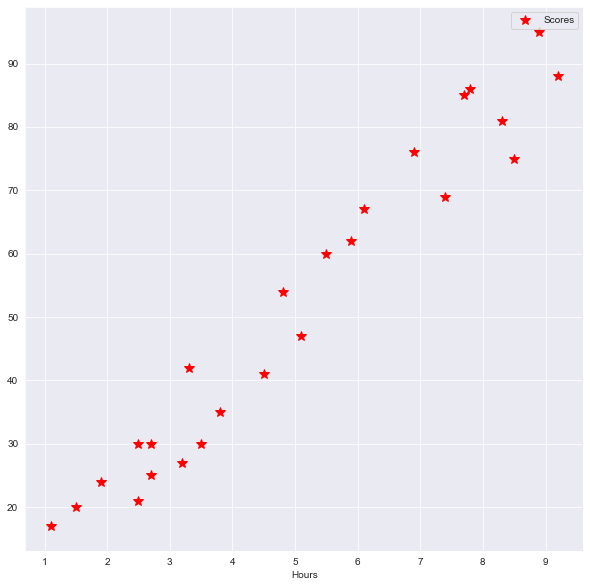

In [76]:
df.plot(x = 'Hours',y='Scores',style = '*',markersize = 10, color = 'red')
plt.show()

<AxesSubplot:>

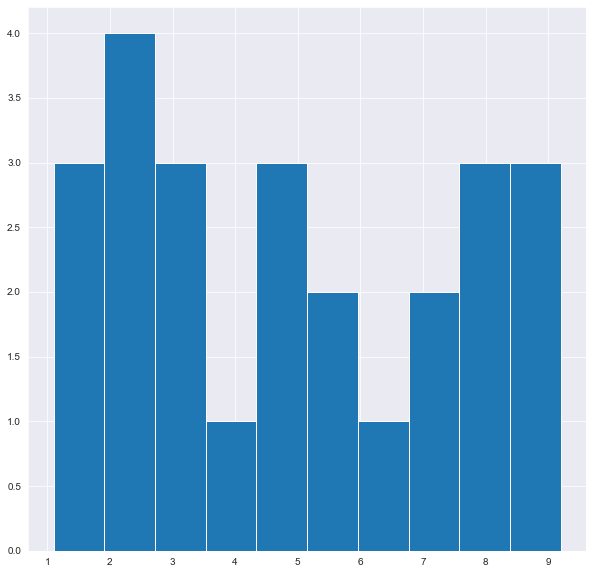

In [77]:
df['Hours'].hist()

<AxesSubplot:>

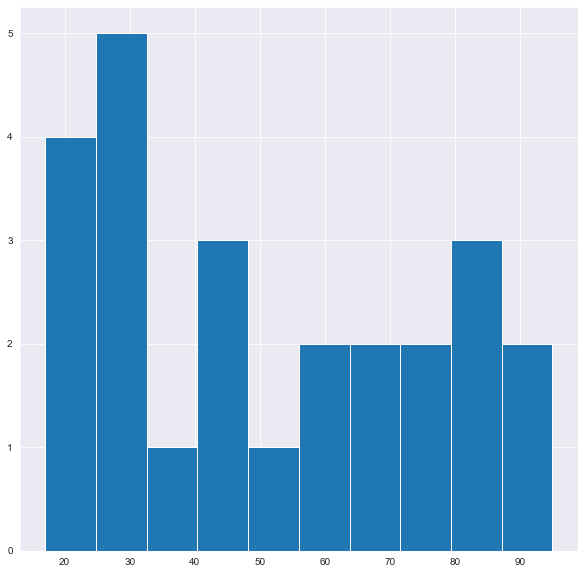

In [78]:
df['Scores'].hist()

# Data Preparation:


In [79]:
x = df.iloc[:, :1].values
y = df.iloc[:, 1:].values

In [80]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [81]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

# Training the Algorithm:

In [82]:
#splitting the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.2, random_state=0)

In [83]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [84]:
model.fit(x_train, y_train)

print("Training Completed")

Training Completed


# visualizing the data model:

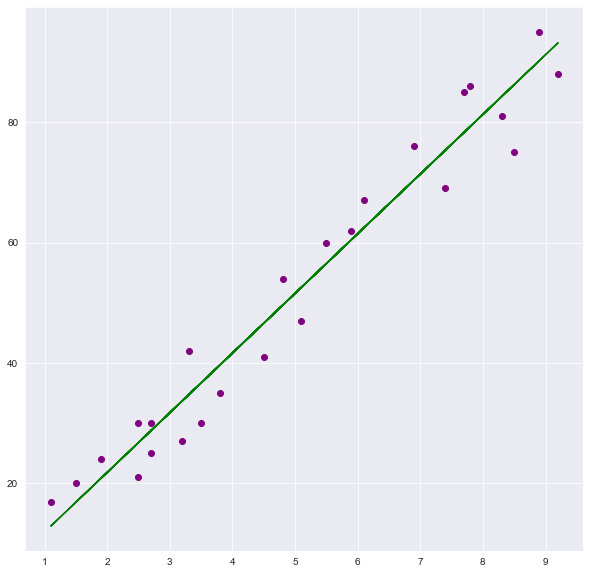

In [85]:
# plotting the regression line
line = model.coef_*x+model.intercept_
plt.scatter(x,y, color ='purple')
plt.plot(x, line , color='green')
plt.xlabel = ("Percentage Scored")
plt.ylabel = ("Hours Studied")
plt.show()

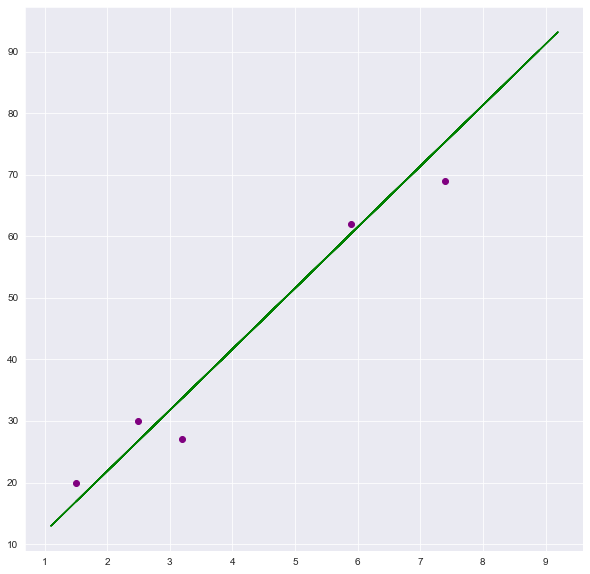

In [86]:
plt.scatter(x_test,y_test, color ='purple')
plt.plot(x, line , color='green')
plt.xlabel = ("Percentage Scored")
plt.ylabel = ("Hours Studied")
plt.show()

# Making Predictions:

In [88]:
print(x_test)
y_pred = model.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [89]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [90]:
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [91]:
#Comparing Actual Vs Predicted
df = pd.DataFrame({'Actual':[y_test], 'Predicted':[y_pred]})
df

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


In [92]:
Hours = 9.25
own_pred = model.predict([[Hours]])
print("No.of Hours  ={}".format([[Hours]]))
print("Predicted Score ={}".format(own_pred[0]))

No.of Hours  =[[9.25]]
Predicted Score =[93.69173249]


# Evaluating the Model:

In [93]:
from sklearn import metrics
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error:  4.183859899002975
